
* lat :  Latitude
* lng:   Longitude
* desc: Description de l'appel
* zip:  Zipcode
* title: titre
* timeStamp: date
* twp: ville
* addr: adresse
* e: variable qui ne sert à rien^^



** Importez les données **

In [35]:
import pandas as pd
import seaborn as sns


In [26]:
df = pd.read_csv("exercice_data.csv")

** Afficher un résumé du dataframe **

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
 9   Reason     663522 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 50.6+ MB


** Afficher l'entete du dataframe **

In [28]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Requetes

** Quels sont les 6 zips code les plus utilisé pour faire des appels 17? **

In [29]:
zip_most_used = df['zip'].value_counts()

In [30]:
zip_most_used.head(6)

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
19002.0    21070
Name: zip, dtype: int64

** Combien de titre unique avez vous**

In [31]:
unique_title = df['title'].nunique()

In [32]:
unique_title

148

** Dans la colonne des titres, il y a des "Motifs/Départements" spécifiés avant le code du titre. Ce sont EMS, Fire et Traffic. Utilisez .apply() avec une expression lambda personnalisée pour créer une nouvelle colonne appelée "Reason" qui contient cette valeur de chaîne.**

**Par exemple, si la valeur de la colonne de titre est EMS : BACK PAINS/INJURY , la valeur de la colonne Reason serait EMS. **

In [33]:
df["Reason"] = df["title"].apply(lambda title :title.split(":")[0])
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS
...,...,...,...,...,...,...,...,...,...,...
663517,40.157956,-75.348060,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:51,EAST NORRITON,SUNSET AVE & WOODLAND AVE,1,Traffic
663518,40.136306,-75.428697,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:19,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR,1,EMS
663519,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:52,LOWER MERION,HAVERFORD STATION RD,1,EMS
663520,40.121603,-75.351437,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:08,NORRISTOWN,MARSHALL ST & HAWS AVE,1,Fire


** Quelle est la raison la plus courante d'un appel au 17 basée sur cette nouvelle colonne ? **

In [34]:
df['Reason'].value_counts().head(1)

EMS    332692
Name: Reason, dtype: int64

** Utilisez maintenant seaborn pour créer le nombre d'appels au 17 par Reason. **

<Axes: xlabel='Reason', ylabel='count'>

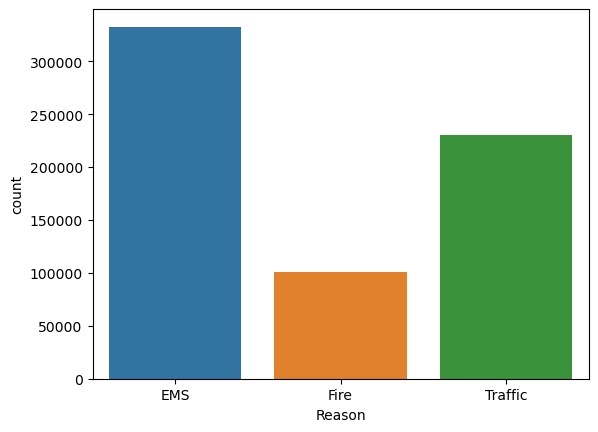

In [36]:
sns.countplot(x="Reason", data = df)

___
** Commençons maintenant à nous concentrer sur les informations temporelles. Quel est le type de données des objets dans la colonne timeStamp ? **

In [39]:
df["timeStamp"] = pd.to_datetime(df["timeStamp"])

In [40]:
df["timeStamp"].dt.month

0         12
1         12
2         12
3         12
4         12
          ..
663517     7
663518     7
663519     7
663520     7
663521     7
Name: timeStamp, Length: 663522, dtype: int64

** Convertir cette colonne en date **

In [184]:
df["timeStamp"] = pd.to_datetime(df["timeStamp"])



**utilisez .apply() pour créer 3 nouvelles colonnes appelées Hour, Month et Day of Week. Vous allez créer ces colonnes à partir de la colonne timeStamp.**

In [46]:
df["Hour"] = df["timeStamp"].apply(lambda x:x.hour)

In [47]:
df['Hour']

0         17
1         17
2         14
3         16
4         16
          ..
663517    15
663518    15
663519    15
663520    15
663521    15
Name: Hour, Length: 663522, dtype: int64

** Les jours de la semaine sont des entiers, pouvez vous convertir ces valeurs avec le nom de ces jours: **

    

** Utilisez maintenant seaborn pour créer un countplot de la colonne  jour de la semaine avec "hue" basée sur la raison de l'appel **

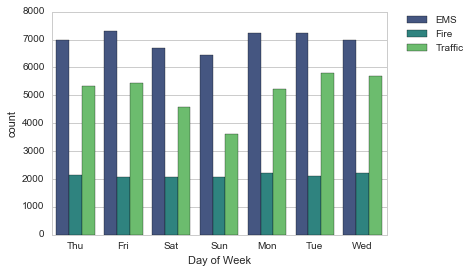

**Faire la meme chose pour le mois:**

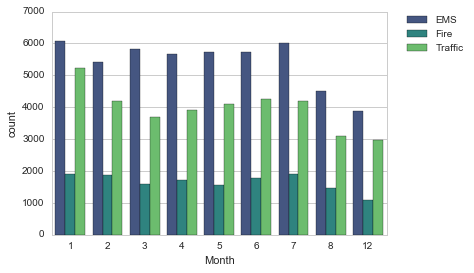

**Que remarquez vous ??**

_____



** Avec la fonction group by, avec la fonction count() pour fair une aggrégation **

'exec'

** Afficher avec le nouveau dataframe le nombre d'appel par mois **

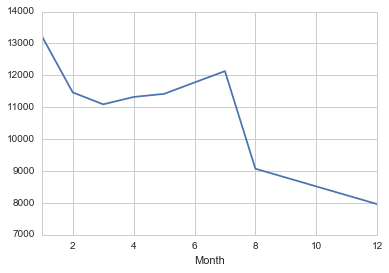

**creez une nouvelle colonne Date à partir du timestamp ** 

** Affichez pour chaque jour le nombre d'appels**

'a'

**Meme graphe mais pour 3 differentes raisons d'appel**

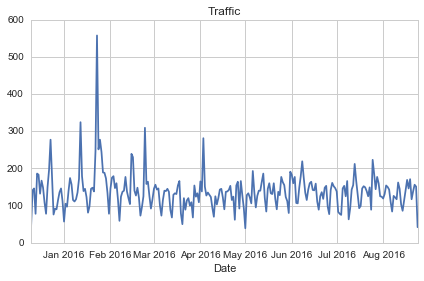

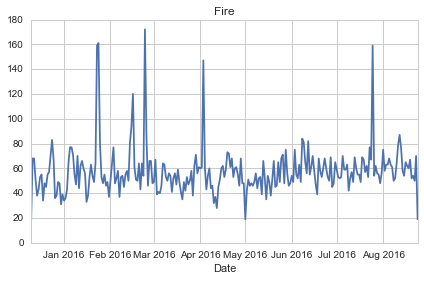

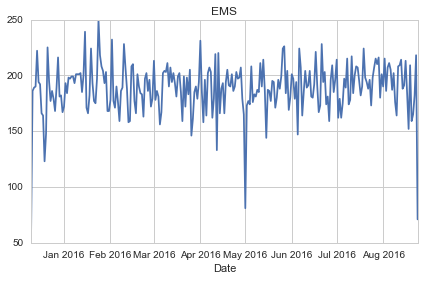